In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/baby-cry-detection/donateacry_corpus_cleaned_and_updated_data/hungry/D54D9C2A-56ED-4338-9D1F-2ADB4E081DAD-1430036283-1.0-m-48-hu.wav
/kaggle/input/baby-cry-detection/donateacry_corpus_cleaned_and_updated_data/hungry/D833237F-1F7C-4338-BEDE-84C0CF5F4145-1430083995-1.0-f-26-hu.wav
/kaggle/input/baby-cry-detection/donateacry_corpus_cleaned_and_updated_data/hungry/F24DE44B-762C-4149-AC92-96A5E57ED118-1430816918-1.0-m-04-hu.wav
/kaggle/input/baby-cry-detection/donateacry_corpus_cleaned_and_updated_data/hungry/9CFD61B9-BF13-406D-8B2F-F73CFAAF25CB-1430927728-1.0-f-04-hu.wav
/kaggle/input/baby-cry-detection/donateacry_corpus_cleaned_and_updated_data/hungry/F2F97740-D638-4B6F-9E09-3AC65F06B448-1436849313-1.1-f-48-hu.wav
/kaggle/input/baby-cry-detection/donateacry_corpus_cleaned_and_updated_data/hungry/F4A0C710-AC2D-42E0-8EA9-3E4CAC31EE20-1430318400-1.0-m-04-hu.wav
/kaggle/input/baby-cry-detection/donateacry_corpus_cleaned_and_updated_data/hungry/20E2B5A0-40A4-4FD8-8935-AFD1DB83351

In [3]:
filename='/kaggle/input/baby-cry-detection/donateacry_corpus_cleaned_and_updated_data'

In [4]:
!pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 44.7 MB/s eta 0:00:00a 0:00:01


In [5]:
import os
import pandas as pd
import librosa

import numpy as np
from scipy.io import wavfile as wav
from sklearn.decomposition import PCA

def traverse_subfolders(subfolders):
    audio_files = []
    subfolder_names = []

    for subfolder in subfolders:
        subfolder_name = os.path.basename(subfolder)
        audio_files.extend(get_audio_files(subfolder))
        subfolder_names.extend([subfolder_name] * len(get_audio_files(subfolder)))

    return audio_files, subfolder_names

def get_audio_files(subfolder):
    audio_files = []

    for root, dirs, files in os.walk(subfolder):
        for file in files:
            if file.endswith(".wav"):
                audio_files.append(os.path.join(root, file))

    return audio_files

def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

def process_audio_files(audio_files, subfolder_names, n_components):
    data = []

    for audio_file, subfolder_name in zip(audio_files, subfolder_names):
        compressed_data = features_extractor(audio_file)  # Extract MFCC features

        data.append([audio_file, compressed_data, subfolder_name])

    df = pd.DataFrame(data, columns=["File", "Compressed Data", "Subfolder Name"])
    return df


def compress_audio_pca(audio_data, n_components):
    audio_data_2d = audio_data.reshape(-1, 1)
    pca = PCA(n_components=n_components)
    compressed_data_2d = pca.fit_transform(audio_data_2d)
    compressed_data = compressed_data_2d.reshape(-1)

    return compressed_data


subfolders = ['/kaggle/input/baby-cry-detection/donateacry_corpus_cleaned_and_updated_data/belly_pain',
              '/kaggle/input/baby-cry-detection/donateacry_corpus_cleaned_and_updated_data/burping',
              '/kaggle/input/baby-cry-detection/donateacry_corpus_cleaned_and_updated_data/discomfort',
              '/kaggle/input/baby-cry-detection/donateacry_corpus_cleaned_and_updated_data/hungry',
              '/kaggle/input/baby-cry-detection/donateacry_corpus_cleaned_and_updated_data/tired']

n_components = 1

audio_files, subfolder_names = traverse_subfolders(subfolders)
df = process_audio_files(audio_files, subfolder_names, n_components)
print(df)

                                                  File  \
0    /kaggle/input/baby-cry-detection/donateacry_co...   
1    /kaggle/input/baby-cry-detection/donateacry_co...   
2    /kaggle/input/baby-cry-detection/donateacry_co...   
3    /kaggle/input/baby-cry-detection/donateacry_co...   
4    /kaggle/input/baby-cry-detection/donateacry_co...   
..                                                 ...   
452  /kaggle/input/baby-cry-detection/donateacry_co...   
453  /kaggle/input/baby-cry-detection/donateacry_co...   
454  /kaggle/input/baby-cry-detection/donateacry_co...   
455  /kaggle/input/baby-cry-detection/donateacry_co...   
456  /kaggle/input/baby-cry-detection/donateacry_co...   

                                       Compressed Data Subfolder Name  
0    [-433.8168, 93.447205, 0.1912862, -10.415295, ...     belly_pain  
1    [-395.30914, 128.01904, -47.220932, 1.3578547,...     belly_pain  
2    [-426.70706, 157.33188, -52.70597, -14.5242, 1...     belly_pain  
3    [-252.2973

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = df.drop("File",axis=1)

In [9]:
data = df.to_csv("Audio_data.csv")

In [11]:
df.rename(columns={"Subfolder Name":"class"},inplace=True)
df.head()

,Compressed Data,class,shape
0,"[-433.8168, 93.447205, 0.1912862, -10.415295, ...",belly_pain,40
1,"[-395.30914, 128.01904, -47.220932, 1.3578547,...",belly_pain,40
2,"[-426.70706, 157.33188, -52.70597, -14.5242, 1...",belly_pain,40
3,"[-252.29735, 145.54681, -58.926727, -16.598595...",belly_pain,40
4,"[-428.3942, 148.9, -69.3062, -15.013275, 28.95...",belly_pain,40


In [10]:
for i in range(457):

    df["shape"] = len(df["Compressed Data"][i])
df.head()

,Compressed Data,Subfolder Name,shape
0,"[-433.8168, 93.447205, 0.1912862, -10.415295, ...",belly_pain,40
1,"[-395.30914, 128.01904, -47.220932, 1.3578547,...",belly_pain,40
2,"[-426.70706, 157.33188, -52.70597, -14.5242, 1...",belly_pain,40
3,"[-252.29735, 145.54681, -58.926727, -16.598595...",belly_pain,40
4,"[-428.3942, 148.9, -69.3062, -15.013275, 28.95...",belly_pain,40


In [12]:
x = df["Compressed Data"]
y=df["class"]
x.shape

(457,)

[]

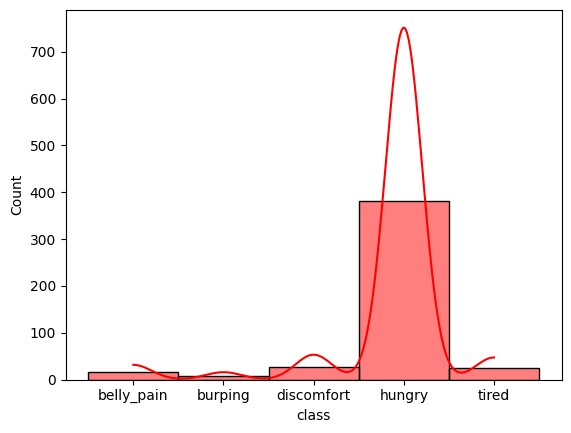

In [17]:
import seaborn as sns
sns.histplot(x=y,data=df, kde=True, bins=20, color='red')
plt.plot()